In [136]:
import pandas as pd
import os
import glob
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import accuracy_score,confusion_matrix

In [137]:
df=pd.read_csv('placementdata.csv')

In [138]:
df.head()

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,T150054001,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,8.0,1
1,T150054002,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1
2,T150054003,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1
3,T150054004,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0
4,T150054005,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0


In [139]:
df.shape

(330, 13)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RegNo.            330 non-null    object 
 1   Quants            330 non-null    int64  
 2   LogicalReasoning  330 non-null    int64  
 3   Verbal            330 non-null    int64  
 4   Programming       330 non-null    int64  
 5   CGPA              330 non-null    float64
 6   Networking        330 non-null    float64
 7   CloudComp         330 non-null    float64
 8   WebServices       330 non-null    float64
 9   DataAnalytics     330 non-null    float64
 10  QualityAssurance  330 non-null    float64
 11  AI                330 non-null    float64
 12  Placed            330 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 33.6+ KB


In [141]:
df.dropna() 

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,T150054001,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,8.0,1
1,T150054002,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1
2,T150054003,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1
3,T150054004,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0
4,T150054005,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,T150054326,22,25,24,23,9.35,8.4,9.4,8.8,8.9,9.1,8.4,0
326,T150054327,25,23,21,22,8.51,8.7,8.8,9.4,8.0,7.6,8.0,0
327,T150054328,21,23,24,25,8.82,7.8,9.3,9.0,8.6,8.1,8.7,0
328,T150054329,22,25,24,21,8.59,7.9,9.4,9.1,9.0,8.3,8.8,1


In [142]:
# Check if missing values exist or not
df.isnull().sum()

RegNo.              0
Quants              0
LogicalReasoning    0
Verbal              0
Programming         0
CGPA                0
Networking          0
CloudComp           0
WebServices         0
DataAnalytics       0
QualityAssurance    0
AI                  0
Placed              0
dtype: int64

In [143]:
df.columns

Index(['RegNo.', 'Quants', 'LogicalReasoning', 'Verbal', 'Programming', 'CGPA',
       'Networking', 'CloudComp', 'WebServices', 'DataAnalytics',
       'QualityAssurance', 'AI', 'Placed'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [144]:
data=df['CGPA'].unique()
len(data)

171

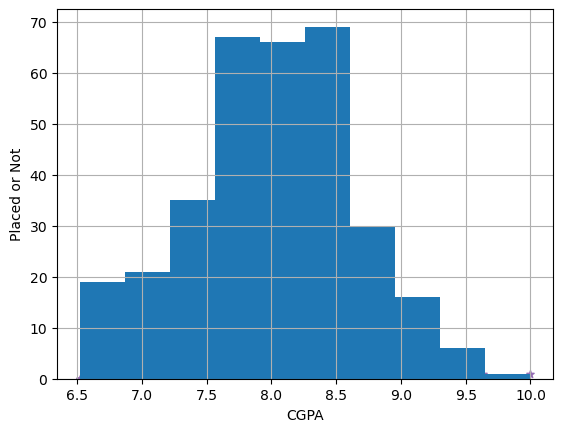

In [145]:
df['CGPA'].hist(bins=10) 


# plotting points as a scatter plot 
x = df["CGPA"] 
y = df["Placed"] 
plt.scatter(x, y, label= "stars", color= "m",marker= "*", s=30) 
# x-axis label 
plt.xlabel('CGPA') 
# frequency label 
plt.ylabel('Placed or Not') 
# function to show the plot 
plt.show() 

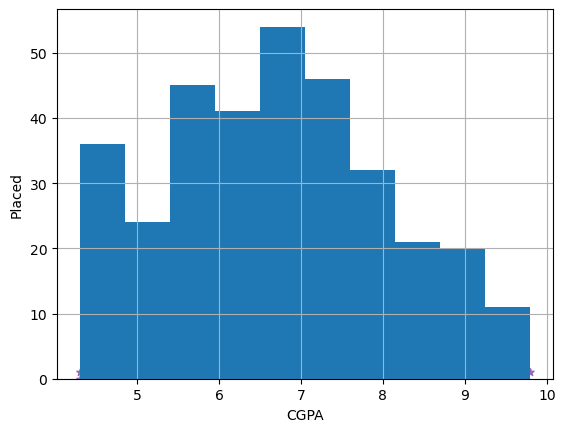

In [146]:
df['AI'].hist(bins=10) 

# plotting points as a scatter plot 
x = df["AI"] 
y = df["Placed"] 
plt.scatter(x, y, label= "stars", color= "m",marker= "*", s=30) 
# x-axis label 
plt.xlabel('CGPA') 
# frequency label 
plt.ylabel('Placed') 
# function to show the plot 
plt.show() 

<AxesSubplot:xlabel='Placed', ylabel='count'>

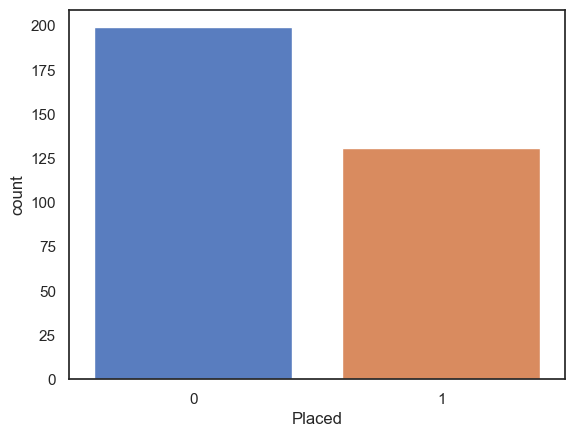

In [147]:
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)
sns.countplot(df["Placed"])

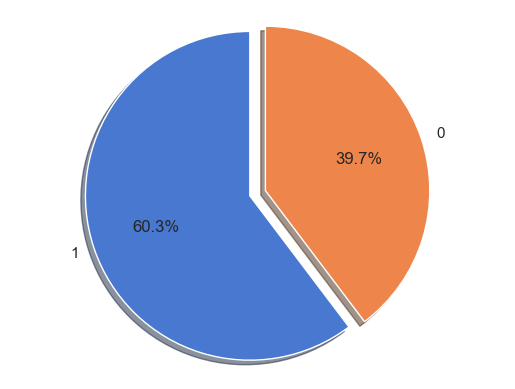

In [148]:
plt.pie(df["Placed"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
       shadow=True, startangle=90,labels=df["Placed"].unique())
plt.axis('equal') ;

# Data Splitting

In [149]:
df.drop(["RegNo."], axis = 1, inplace = True) 

In [150]:
df.columns

Index(['Quants', 'LogicalReasoning', 'Verbal', 'Programming', 'CGPA',
       'Networking', 'CloudComp', 'WebServices', 'DataAnalytics',
       'QualityAssurance', 'AI', 'Placed'],
      dtype='object')

In [151]:
x=df.iloc[:,df.columns !='Placed']
y=df.iloc[:,df.columns =='Placed']

In [152]:
x.head()

,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI
0,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,8.0
1,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4
2,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4
3,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6
4,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4


In [153]:
y.head()

,Placed
0,1
1,1
2,1
3,0
4,0


In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25)

In [156]:
x_train.head()

,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI
51,10,11,8,14,8.98,3.0,5.6,9.0,8.0,8.8,8.0
240,14,20,14,18,8.38,7.3,7.8,8.1,6.5,5.9,5.5
139,17,14,16,18,7.60,6.5,7.8,8.3,6.2,6.7,6.9
28,9,8,10,12,6.83,4.8,7.0,6.4,3.0,4.8,5.2
22,10,11,8,13,7.46,4.3,5.7,6.5,4.7,2.2,4.7


In [157]:
y_train.head()

,Placed
51,1
240,1
139,0
28,0
22,0


In [158]:
x_train.shape

(247, 11)

In [159]:
y_train.shape

(247, 1)

In [160]:
x_test.shape

(83, 11)

In [161]:
y_test.shape

(83, 1)

# Models

# Decision Tree Classifier 


In [162]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier 

In [163]:
tree = DecisionTreeClassifier() 

In [164]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [165]:
y_pred = tree.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [166]:
model1=metrics.accuracy_score(y_test,y_pred)
print(model1)

0.6746987951807228


In [167]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[32, 14],
       [13, 24]], dtype=int64)

# Random Forest Classifier

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [170]:
model2=metrics.accuracy_score(y_test,y_pred)
print(model2)

0.7108433734939759


# SVM

In [171]:
from sklearn import svm

In [172]:
support = svm.LinearSVC(random_state=42)
support.fit(x_train,y_train)
y_pred = support.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [173]:
model3=metrics.accuracy_score(y_test,y_pred)
print(model3)

0.6987951807228916


In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
clf = LogisticRegression()

In [176]:
clf.fit(x_train,y_train)

LogisticRegression()

In [177]:
y_pred=clf.predict(x_test)

In [178]:
model4=clf.score(x_test,y_test)

In [179]:
print(model4)

0.6144578313253012


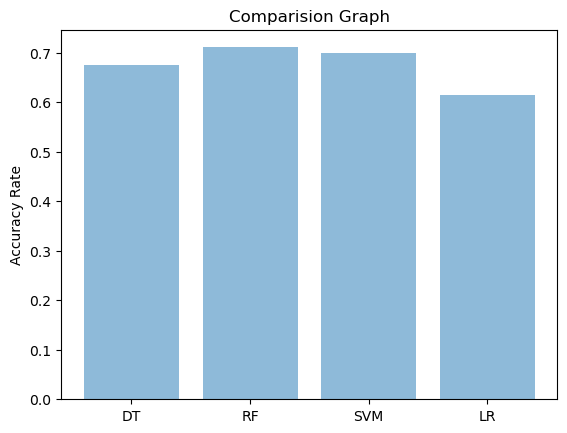

In [180]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('DT','RF','SVM','LR')
y_pos = np.arange(len(objects))
performance = [model1,model2,model3,model4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Rate')
plt.title('Comparision Graph')

plt.show()